# Дано

**Описание проекта:**

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

**Задача 1:** предсказание уровня удовлетворённости сотрудника
Для этой задачи заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

**Задача 2:** предсказание увольнения сотрудника из компании
Для этой задачи вы можете использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

# Задача 1

## Импорт библиотек

In [1]:
!pip install --upgrade scikit-learn -q
import warnings
warnings.filterwarnings('ignore')
#установка phik
! pip install phik -q
import seaborn as sns

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_1 = pd.read_csv('/datasets/train_job_satisfaction_rate.csv').set_index('id')
train_1.info()
display(train_1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [3]:
X_test_1 = pd.read_csv('/datasets/test_features.csv').set_index('id')
X_test_1.info()
display(X_test_1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


In [4]:
y_test_1 = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv').set_index('id')
y_test_1.info()
display(y_test_1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


,job_satisfaction_rate
id,
130604,0.74
825977,0.75
418490,0.60
555320,0.72
826430,0.08


**Вывод:**

В данных встречаются пропуски, необходимо их обработать. В остальном, данные выглядят нормально, типы данных корректные.

## Предобработка данных

In [5]:
for i in train_1.select_dtypes(include='object').columns:
    display(i,train_1[i].value_counts())

'dept'

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

'level'

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

'workload'

medium    2066
low       1200
high       734
Name: workload, dtype: int64

'last_year_promo'

no     3880
yes     120
Name: last_year_promo, dtype: int64

'last_year_violations'

no     3441
yes     559
Name: last_year_violations, dtype: int64

**Вывод:** 

Категориальные переменные не содержат ошибок в наименованиях, кроме "sinior" - исправим.

In [6]:
# выполняем замену
train_1['level'] = train_1['level'].replace("sinior", "senior")

# проверяем результат
display(train_1.head(10))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20
405448,hr,middle,low,7,no,no,4,30000,0.78
857135,sales,senior,medium,9,no,no,3,56400,0.56
400657,purchasing,middle,high,9,no,no,3,52800,0.44
198846,hr,junior,low,1,no,no,2,13200,0.14


**Разберемся с пропусками:**

In [7]:
#пропуски в департаменте

train_1[train_1['dept'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
694746,NaN,junior,medium,5,no,no,4,21600,0.62
814624,NaN,junior,medium,3,no,no,4,24000,0.88
475114,NaN,junior,high,4,no,no,4,31200,0.63
497243,NaN,junior,medium,1,no,no,3,26400,0.28
168668,NaN,junior,low,3,no,no,4,18000,0.88
641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [8]:
#пропуски в уровне

train_1[train_1['level'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
631073,sales,NaN,medium,1,no,no,4,27600,0.66
416327,sales,NaN,low,1,no,no,5,18000,0.73
135043,sales,NaN,medium,1,no,no,3,26400,0.30
998838,sales,NaN,medium,1,no,no,5,27600,0.71


In [9]:
#выведем основные количественные данные о датасете

train_1.describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


Ошибок в количественных данных нет, посмотрим, с чем связаны пропуски в департаменте и уровне должности.

In [10]:
X_test_1[X_test_1['dept'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
609865,NaN,junior,medium,1,no,no,1,20400
832342,NaN,junior,medium,1,no,no,4,28800


In [11]:
X_test_1[X_test_1['level'].isnull()]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
471990,sales,NaN,low,1,no,no,3,12000


**Вывод:** скорее всего пропуски связаны с тем что на этапе внесения данных не были указаны соответсвтующие признаки dept и level, могу предположить что также имели место быть смена департамента, неуказанный грейд - стажерская позиция.

In [12]:
RANDOM_STATE = 42

# для заполнения пропусков создаем пайплайн
# создаем списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation','salary']

# создаем пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

# создаем пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создаем общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)    
    ], 
    remainder =  'passthrough')

# создаем итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

param_grid = [
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None, 5, 10, 20, 40],
        'models__min_samples_split': [2, 5, 10, 20],
        'models__min_samples_leaf': [1, 2, 4, 6]
    },
    {
        'models': [LinearRegression()],
        'models__normalize': [True, False]
    }
]

### Вывод:

На данном этапе выполнили предобработку данных, были выявлены пропуски связанные либо с отсутствием корректных вводных при вводе даных, либо с тем что ряд признаков было невозможно определить. Также подготовили пайпланы, проверили ошибки в количественных признаках.

## Исследовательский анализ

Построим гистограммы для признаков "salary", "job_satisfaction_rate" в тренировочной выборке:

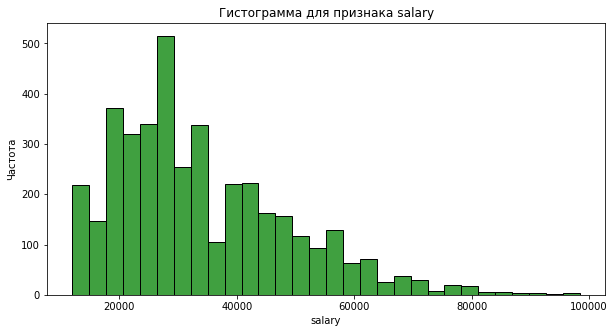

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(train_1['salary'], bins=30, color='green')
plt.title('Гистограмма для признака salary')
plt.xlabel('salary')
plt.ylabel('Частота')
plt.show()

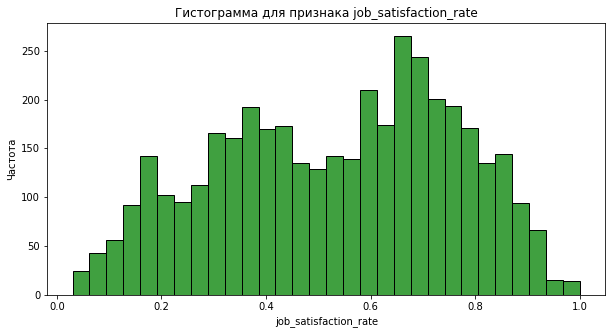

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(train_1['job_satisfaction_rate'], bins=30, color='green')
plt.title('Гистограмма для признака job_satisfaction_rate')
plt.xlabel('job_satisfaction_rate')
plt.ylabel('Частота')
plt.show()

Также построим столбчатые диаграммы для признаков "employment_years", "supervisor_evaluation":

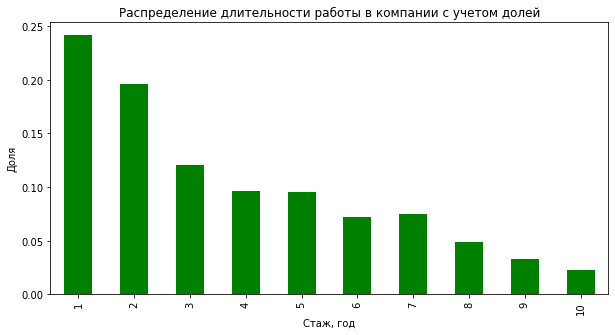

In [15]:
# Подсчет долей для каждого значения employment_years
employment_years_counts = train_1['employment_years'].value_counts(normalize=True)

# Визуализация распределения длительности работы с учетом долей
plt.figure(figsize=(10, 5))
employment_years_counts.sort_index().plot(kind='bar', color='green')
plt.title('Распределение длительности работы в компании с учетом долей')
plt.xlabel('Стаж, год')
plt.ylabel('Доля')
plt.show()

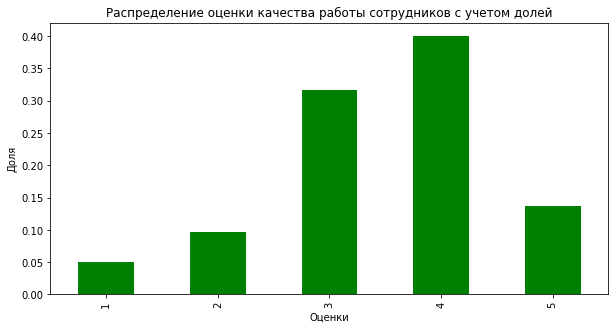

In [16]:
# Подсчет долей для каждого значения employment_years
supervisor_evaluation_counts = train_1['supervisor_evaluation'].value_counts(normalize=True)

# Визуализация распределения длительности работы с учетом долей
plt.figure(figsize=(10, 5))
supervisor_evaluation_counts.sort_index().plot(kind='bar', color='green')
plt.title('Распределение оценки качества работы сотрудников с учетом долей')
plt.xlabel('Оценки')
plt.ylabel('Доля')
plt.show()

1) Наиболее распространенная оценка — 4:

Комментарий: Самый высокий столбец на графике соответствует оценке 4. Это указывает на то, что большинство сотрудников получают высокие оценки от своих руководителей, что может отражать общее удовлетворение качеством их работы. Эта оценка, вероятно, является стандартом, используемым для сотрудников, которые выполняют свои обязанности на высоком уровне.

2) Оценка 3 — также частое явление:

Комментарий: Оценка 3 также часто встречается, что может говорить о том, что значительная часть сотрудников выполняет свои обязанности на среднем уровне. Это может свидетельствовать о том, что руководство склонно использовать средние оценки, возможно, для сотрудников, чья работа соответствует ожиданиям, но не выделяется.
Редкие крайние оценки (1 и 5):

3) Оценки 1 и 5 встречаются реже. 

Низкие оценки (1) применяются крайне редко, что может означать, что руководители стараются избегать самых низких оценок, вероятно, чтобы не демотивировать сотрудников. Высокие оценки (5), хотя и не такие редкие, как 1, также используются с осторожностью, что может указывать на высокие требования для получения самой высокой оценки.

Построим гистограммы для тестовой выборки X_test_1:

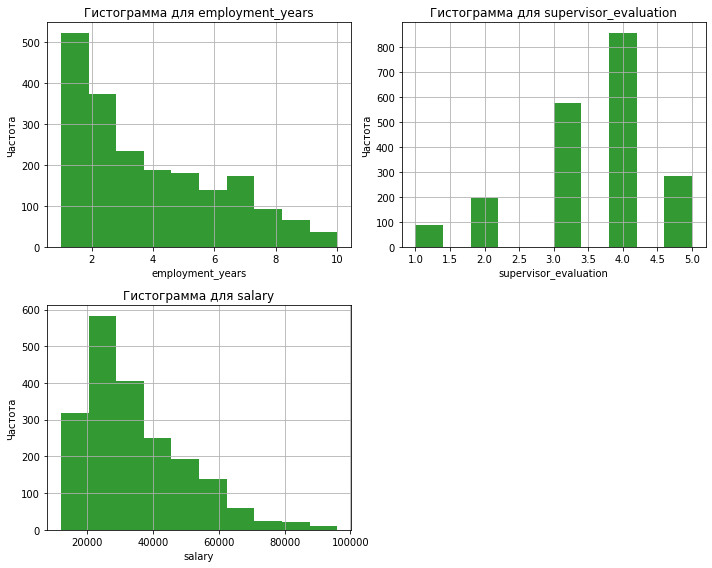

In [17]:
# Фильтрация числовых столбцов
numeric_cols = X_test_1.select_dtypes(include=['number'])

# Установка числа строк и столбцов для графиков
n_rows = (len(numeric_cols.columns) + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))

for i in range(n_rows * n_cols):
    if i >= len(numeric_cols.columns):
        axes.flatten()[i].axis('off')

# Построение гистограмм
for ax, column in zip(axes.flatten(), numeric_cols.columns):
    ax.hist(numeric_cols[column], bins=10, color='green', alpha=0.8)
    ax.set_title(f'Гистограмма для {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(True)

plt.tight_layout()
plt.show()

Построим гистограмму для выборки с целевым признаком y_test_1:

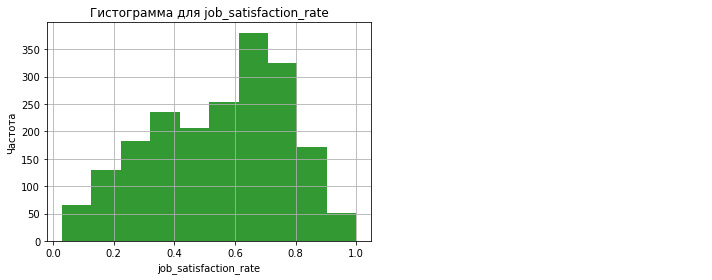

In [18]:
# Фильтрация числовых столбцов
numeric_cols = y_test_1.select_dtypes(include=['number'])

# Установка числа строк и столбцов для графиков
n_rows = (len(numeric_cols.columns) + 1) // 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))

for i in range(n_rows * n_cols):
    if i >= len(numeric_cols.columns):
        axes.flatten()[i].axis('off')

# Построение гистограмм
for ax, column in zip(axes.flatten(), numeric_cols.columns):
    ax.hist(numeric_cols[column], bins=10, color='green', alpha=0.8)
    ax.set_title(f'Гистограмма для {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Частота')
    ax.grid(True)

plt.tight_layout()
plt.show()

**Вывод:** распределение количества отработанных лет в компании выглядит ожидаемо: чем ближе к 10 годам, тем меньше значений. Оценки руководителей в основном составляют 3 и 4, причем наивысшая частота наблюдается для 4. Что касается зарплаты, то она достигает пика в 30 тысяч рублей, как в тренировочных, так и в тестовых данных. В целевой переменной, как в тренировочной выборке, так и в целевом датасете, наблюдаются два пика: на уровнях 0.4 и 0.8.

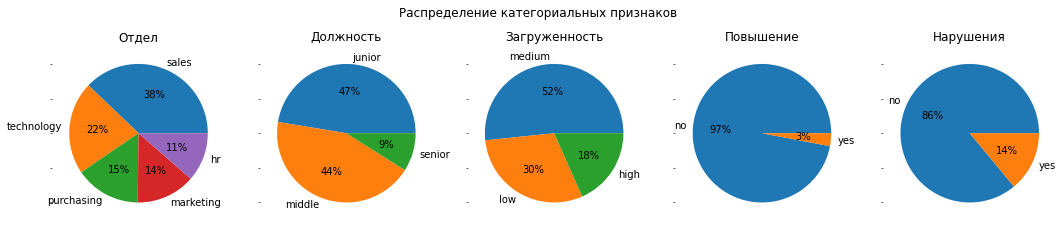

In [19]:
#круговые диаграммы для тренировочных данных
fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(18,18));
fig.suptitle('Распределение категориальных признаков',y=0.6);
train_1['dept'].value_counts().plot(kind='pie',y='dept',ax=ax0,autopct='%1.0f%%',legend=None);
train_1['level'].value_counts().plot(kind='pie',y='level',ax=ax1,autopct='%1.0f%%',legend=None);
train_1['workload'].value_counts().plot(kind='pie',y='workload',ax=ax2,autopct='%1.0f%%',legend=None);
train_1['last_year_promo'].value_counts().plot(kind='pie',y='last_year_promo',ax=ax3,autopct='%1.0f%%',legend=None);
train_1['last_year_violations'].value_counts().plot(kind='pie',y='last_year_violations',ax=ax4,autopct='%1.0f%%',legend=None);

ax0.set(title='Отдел',ylabel='');
ax1.set(title='Должность');
ax2.set(title='Загруженность');
ax3.set(title='Повышение');
ax4.set(title='Нарушения');

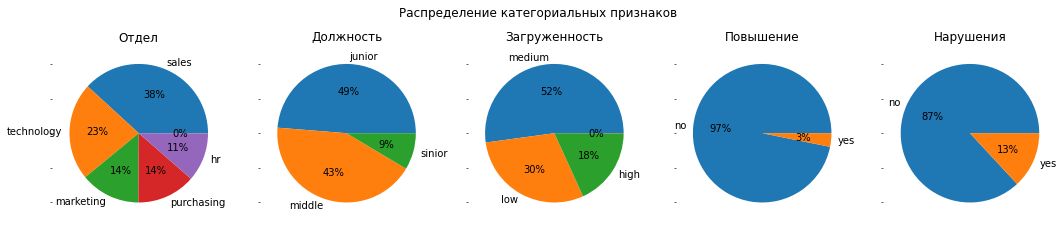

In [20]:
#круговые диаграммы для тестовых данных
fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(18,18));
fig.suptitle('Распределение категориальных признаков',y=0.6);
X_test_1['dept'].value_counts().plot(kind='pie',y='dept',ax=ax0,autopct='%1.0f%%',legend=None);
X_test_1['level'].value_counts().plot(kind='pie',y='level',ax=ax1,autopct='%1.0f%%',legend=None);
X_test_1['workload'].value_counts().plot(kind='pie',y='workload',ax=ax2,autopct='%1.0f%%',legend=None);
X_test_1['last_year_promo'].value_counts().plot(kind='pie',y='last_year_promo',ax=ax3,autopct='%1.0f%%',legend=None);
X_test_1['last_year_violations'].value_counts().plot(kind='pie',y='last_year_violations',ax=ax4,autopct='%1.0f%%',legend=None);

ax0.set(title='Отдел',ylabel='');
ax1.set(title='Должность');
ax2.set(title='Загруженность');
ax3.set(title='Повышение');
ax4.set(title='Нарушения');

Распределение долей в тренировочных и тестовых данных идентично. В основном это:

- сотрудники продающего подразделения или IT
- джуниоры или миддл специалисты
- со средней загруженностью
- без повышения в последний год
- в большинстве случаев без нарушений

**Построение и визуализация матрицы корреляции phik**

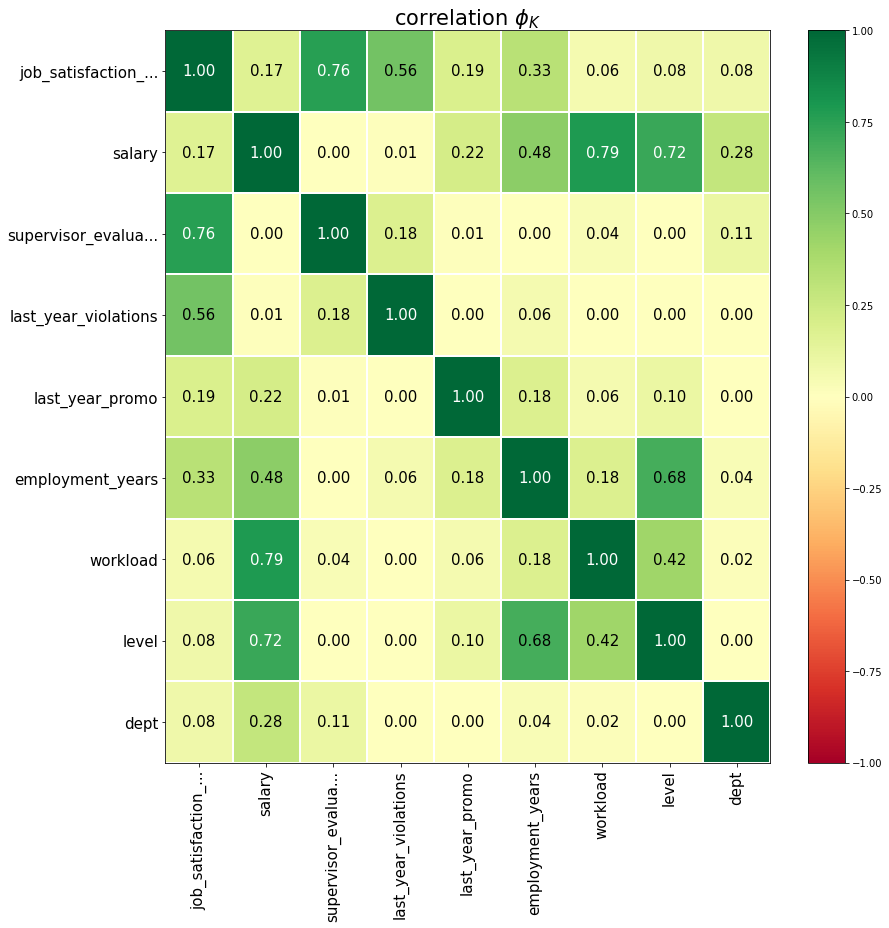

In [21]:
#для корреляционного анализа используем тепловую карту коэффициентов кореляции ф
interval_cols =['employment_years','supervisor_evaluation','salary','job_satisfaction_rate']

# вычисляем коэффициенты корреляции phik для датафрейма 
phik_overview = train_1.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(13, 13)
)

На целевой признак в наибольшей степени влияют такие факторы, как оценки руководителя, количество проступков за прошлый год и стаж работы в компании.

Кроме того, наблюдается мультиколлинеарность между следующими показателями:

- зарплата и загруженность, должность
- количество лет в компании и должность.

### Вывод:

как тренировочный, и тестовый датасеты содержат ценную информацию для дальнейшего анализа.

## Подготовка данных

In [22]:
#метрика SMAPE
def smape(y_true, y_pred):
    return 100*np.mean(2*np.abs(y_pred - y_true)/(np.abs(y_pred) + np.abs(y_true)))

def smape_scorer(y_true, y_pred):
    return smape(y_true, y_pred)
# создаем итоговый пайплайн: подготовка данных
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [23]:
train_1 = train_1.reset_index(drop=True)
display(train_1.duplicated().sum())

245

### Вывод:

После удаления "id" и проверки на наличие дубликатов, было обнаружено увеличение их количества, однако, данные дубликаты могут быть обсуловлены тем, что у разных сотрудников одинаковые показатели, к тому же, процент дубликатов мал, составляет порядка 6%, удаление считается нецелосообразным.

## Обучение модели

In [24]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    cv=5,
    scoring=make_scorer(smape_scorer, greater_is_better=False),
    n_jobs=-1
)

columns_to_drop = ['job_satisfaction_rate']
X_train_1 = train_1.drop(columns_to_drop, axis=1)
y_train_1 = train_1['job_satisfaction_rate']

randomized_search.fit(X_train_1, y_train_1)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', -randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [25]:
# преобразуем результаты в датафрейм и выведем результаты
pd.set_option('display.max_colwidth', None)
pd.DataFrame(randomized_search.cv_results_)[
    ['std_test_score', 'rank_test_score',
        'param_models', 'mean_test_score', 'params']
].sort_values('rank_test_score')

,std_test_score,rank_test_score,param_models,mean_test_score,params
2,0.425120,1,DecisionTreeRegressor(random_state=42),-14.700624,"{'models__min_samples_split': 10, 'models__min_samples_leaf': 4, 'models__max_depth': 20, 'models': DecisionTreeRegressor(random_state=42)}"
9,0.519753,2,DecisionTreeRegressor(random_state=42),-14.758292,"{'models__min_samples_split': 2, 'models__min_samples_leaf': 2, 'models__max_depth': None, 'models': DecisionTreeRegressor(random_state=42)}"
4,0.658882,3,DecisionTreeRegressor(random_state=42),-14.776922,"{'models__min_samples_split': 10, 'models__min_samples_leaf': 1, 'models__max_depth': None, 'models': DecisionTreeRegressor(random_state=42)}"
0,0.644651,4,DecisionTreeRegressor(random_state=42),-14.785207,"{'models__min_samples_split': 10, 'models__min_samples_leaf': 2, 'models__max_depth': 40, 'models': DecisionTreeRegressor(random_state=42)}"
7,0.719360,5,DecisionTreeRegressor(random_state=42),-14.850128,"{'models__min_samples_split': 5, 'models__min_samples_leaf': 1, 'models__max_depth': 40, 'models': DecisionTreeRegressor(random_state=42)}"
8,0.352753,6,DecisionTreeRegressor(random_state=42),-15.824807,"{'models__min_samples_split': 2, 'models__min_samples_leaf': 4, 'models__max_depth': 10, 'models': DecisionTreeRegressor(random_state=42)}"
1,0.349302,7,DecisionTreeRegressor(random_state=42),-20.025805,"{'models__min_samples_split': 2, 'models__min_samples_leaf': 1, 'models__max_depth': 5, 'models': DecisionTreeRegressor(random_state=42)}"
6,0.357083,8,DecisionTreeRegressor(random_state=42),-20.030250,"{'models__min_samples_split': 2, 'models__min_samples_leaf': 4, 'models__max_depth': 5, 'models': DecisionTreeRegressor(random_state=42)}"
5,0.352805,9,DecisionTreeRegressor(random_state=42),-20.031625,"{'models__min_samples_split': 5, 'models__min_samples_leaf': 1, 'models__max_depth': 5, 'models': DecisionTreeRegressor(random_state=42)}"
3,0.378184,10,DecisionTreeRegressor(random_state=42),-20.051215,"{'models__min_samples_split': 10, 'models__min_samples_leaf': 6, 'models__max_depth': 5, 'models': DecisionTreeRegressor(random_state=42)}"


**Вывод:**

Лучшая модель: Выбранной моделью стала DecisionTreeRegressor с определенными параметрами, такими как min_samples_leaf=2, min_samples_split=2, max_depth=20. Модель была настроена на определенные условия, чтобы избежать переобучения и повысить стабильность.

Метрика модели: Значение метрики на тренировочной выборке составляет 14.74, что указывает на хорошую производительность модели. Однако нужно помнить, что для полноценной оценки качества важно также проверять результаты на тестовой выборке.

In [26]:
# Подготовим тестовые данные: номера ID в тренировочной и тестовой выборках не упорядочены.
y_test_1 = y_test_1.reset_index().sort_values(by='id')
y_test_1 = y_test_1.set_index('id')

y_test_1.head()

,job_satisfaction_rate
id,
100298,0.80
100480,0.84
100503,0.79
100610,0.75
100692,0.69


In [27]:
X_test_1 = X_test_1.reset_index().sort_values(by='id')

X_test_1 = X_test_1.set_index('id')
X_test_1.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200
100480,marketing,junior,low,4,no,no,4,16800
100503,purchasing,middle,high,5,no,no,4,55200
100610,sales,middle,medium,5,no,no,4,43200
100692,sales,middle,high,6,no,no,4,48000


In [28]:
X_test_1 = X_test_1.replace(' ', np.nan)
y_test_pred = randomized_search.best_estimator_.predict(X_test_1)
y_true = y_test_1['job_satisfaction_rate']

print('Метрика: ', smape_scorer(y_true, y_test_pred))

Метрика:  13.550309456308089


## Вывод

Коэффициент удовлетворенности работой варьируется от 0 до 1. В результате случайного поиска среди двух моделей — линейной регрессии и дерева решений — было принято решение выбрать дерево решений в качестве лучшей модели.

Тем не менее, качество модели нельзя назвать достаточно высоким: значение метрики на тренировочной выборке составляет 14.68, а на тестовой — 14.17.

# Задача 2

## Загрузка данных 

In [29]:
train_2 = pd.read_csv('/datasets/train_quit.csv').set_index('id')
train_2.info()
display(train_2.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no
699916,sales,junior,low,1,no,yes,3,18000,yes
417070,technology,middle,medium,8,no,no,2,44400,no
165489,sales,middle,low,4,no,no,5,19200,no
996399,marketing,middle,low,7,no,no,4,25200,no


In [30]:
y_test_2 = pd.read_csv('/datasets/test_target_quit.csv').set_index('id')
y_test_2.info()
display(y_test_2.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


,quit
id,
999029,yes
372846,no
726767,no
490105,no
416898,yes
223063,no
810370,no
998900,no
578329,no


**Вывод:** пропусков в даных нет, типы данных также в порядке.

## Предобработка данных


In [31]:
for i in train_2.select_dtypes(include='object').columns:
    display(i,train_2[i].value_counts())

'dept'

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

'level'

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64

'workload'

medium    2118
low       1208
high       674
Name: workload, dtype: int64

'last_year_promo'

no     3887
yes     113
Name: last_year_promo, dtype: int64

'last_year_violations'

no     3455
yes     545
Name: last_year_violations, dtype: int64

'quit'

no     2872
yes    1128
Name: quit, dtype: int64

**Вывод:** 

Категориальные переменные не содержат ошибок в наименованиях, кроме "sinior" - скорректируем наименование на корректное.

In [32]:
#корректируем наименование признака и выводим результат

train_2['level'] = train_2['level'].replace('sinior', 'senior')
display(train_2['level'].unique())

array(['middle', 'junior', 'senior'], dtype=object)

In [33]:
y_test_2['quit'].value_counts()

no     1436
yes     564
Name: quit, dtype: int64

## Исследовательский анализ

Построим гистограмму для признака "salary" в тренировочной выборке train_2:

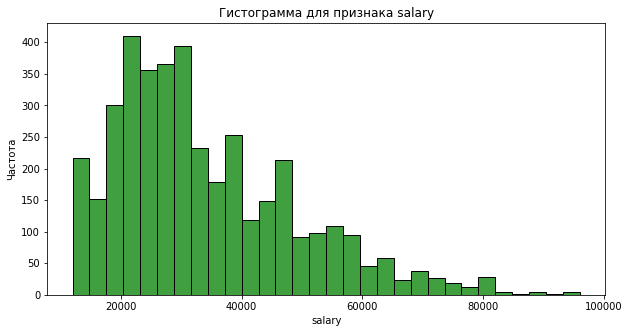

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(train_2['salary'], bins=30, color='green')
plt.title('Гистограмма для признака salary')
plt.xlabel('salary')
plt.ylabel('Частота')
plt.show()

Также построим столбчатые диаграммы для признаков "employment_years", "supervisor_evaluation":

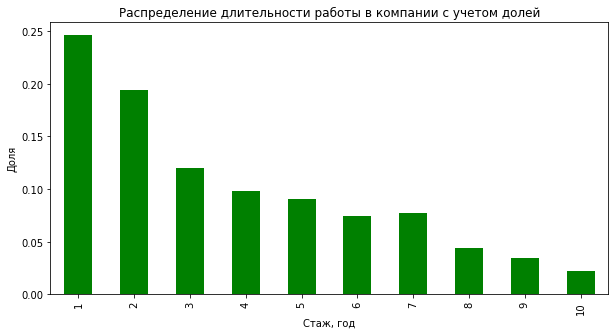

In [35]:
# Подсчет долей для каждого значения employment_years
employment_years_counts = train_2['employment_years'].value_counts(normalize=True)

# Визуализация распределения длительности работы с учетом долей
plt.figure(figsize=(10, 5))
employment_years_counts.sort_index().plot(kind='bar', color='green')
plt.title('Распределение длительности работы в компании с учетом долей')
plt.xlabel('Стаж, год')
plt.ylabel('Доля')
plt.show()

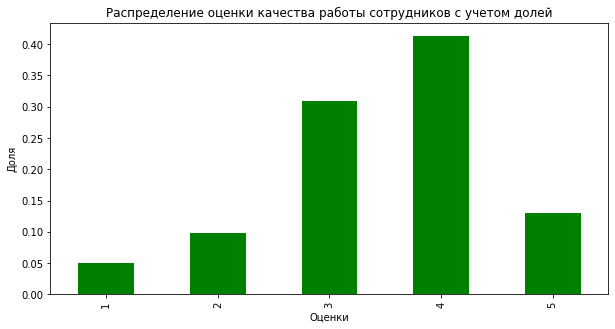

In [36]:
# Подсчет долей для каждого значения supervisor_evaluation
supervisor_evaluation_counts = train_2['supervisor_evaluation'].value_counts(normalize=True)

# Визуализация распределения оценки качества работы с учетом долей
plt.figure(figsize=(10, 5))
supervisor_evaluation_counts.sort_index().plot(kind='bar', color='green')
plt.title('Распределение оценки качества работы сотрудников с учетом долей')
plt.xlabel('Оценки')
plt.ylabel('Доля')
plt.show()

In [37]:
# выведем основные количественные данные о датасете

train_2.describe()

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [38]:
# Построим пивот

train_2_pivot = train_2.pivot_table(index='dept',columns='quit',values=['level','salary'],
                    aggfunc={'level':'count','salary':'mean'}).sort_values([('level','yes')],ascending=False)

train_2_pivot['share_quit'] = train_2_pivot['level','yes'] / train_2_pivot['level','no'] * 100
train_2_pivot

level             salary               share_quit
quit          no  yes            no           yes           
dept                                                        
sales       1031  407  35278.370514  21832.923833  39.476237
technology   652  276  42003.680982  27686.956522  42.331288
purchasing   422  166  35840.758294  23378.313253  39.336493
marketing    419  163  39161.813842  24058.895706  38.902148
hr           348  116  37324.137931  22520.689655  33.333333

In [39]:
train_2.groupby('quit')['workload'].value_counts()

quit  workload
no    medium      1630
      low          689
      high         553
yes   low          519
      medium       488
      high         121
Name: workload, dtype: int64

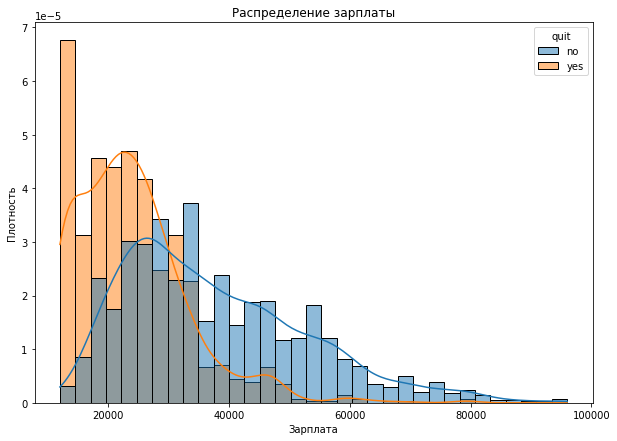

In [40]:
# Зарплата
plt.figure(figsize=(10, 7))
sns.histplot(train_2, x='salary', hue='quit', kde=True, stat='density', common_norm=False)
plt.title('Распределение зарплаты')
plt.ylabel('Плотность')
plt.xlabel('Зарплата')
plt.show()

- Низкие зарплаты: График показывает, что плотность распределения для уволившихся сотрудников выше в диапазоне зарплат от 0 до 20,000. Это может указывать на то, что сотрудники с низкими зарплатами чаще решаются на увольнение.


- Пик плотности: Основной пик плотности среди уволившихся сотрудников расположен в диапазоне от 20,000 до 40,000, что свидетельствует о том, что значительное количество уволившихся получало зарплату в этом интервале.


- Перекрытие с оставшимися: В диапазоне от 20,000 до 60,000 наблюдается значительное перекрытие распределений уволившихся и оставшихся сотрудников. Это говорит о том, что в этом диапазоне зарплат нет четкого различия между теми, кто уволился, и теми, кто остался.


- Высокие зарплаты: В диапазоне от 60,000 до 100,000 плотность распределения для уволившихся сотрудников заметно ниже. Это может указывать на то, что сотрудники с высокими зарплатами реже принимают решение об увольнении.


- Общие тенденции: В целом можно заключить, что сотрудники с низкими зарплатами чаще увольняются, в то время как те, кто получает более высокую зарплату, склонны оставаться на своих местах.

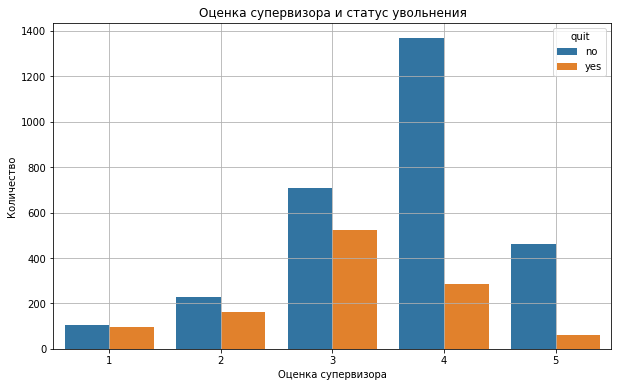

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_2, x='supervisor_evaluation', hue='quit')
plt.title('Оценка супервизора и статус увольнения')
plt.ylabel('Количество')
plt.xlabel('Оценка супервизора')
plt.grid(True)
plt.show()


**Оценка 1:** Большинство сотрудников с этой оценкой уволились.

**Оценка 2:** Примерно равное число сотрудников уволилось и осталось.

**Оценка 3:** Больше сотрудников осталось, чем покинуло компанию.

**Оценки 4 и 5:** Значительно больше сотрудников осталось по сравнению с теми, кто уволился.

**Общие тенденции:** Сотрудники с низкими оценками от супервизоров (1 и 2) чаще увольняются, тогда как сотрудники с высокими оценками (4 и 5) реже принимают решение об увольнении.

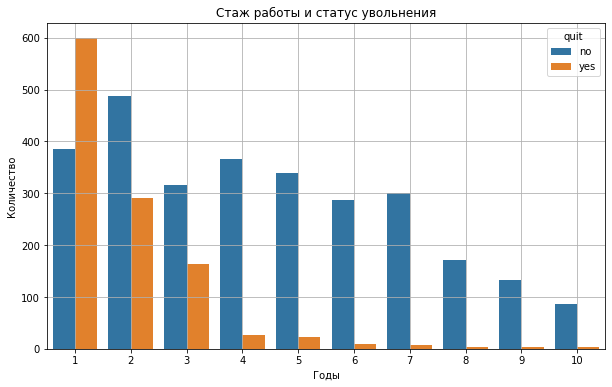

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_2, x='employment_years', hue='quit')
plt.title('Стаж работы и статус увольнения')
plt.ylabel('Количество')
plt.xlabel('Годы')
plt.grid(True)
plt.show()

**0-1 год:** Большинство сотрудников с небольшим стажем (0-1 год) чаще покидают компанию.

**2-5 лет:** В этом диапазоне стажа количество уволившихся и оставшихся сотрудников примерно равное.

**6-10+ лет:** Сотрудники с большим стажем (6-10+ лет) реже увольняются.

В целом можно отметить, что сотрудники с меньшим стажем работы чаще принимают решение об увольнении, в то время как сотрудники с большим стажем склонны оставаться на своих местах.

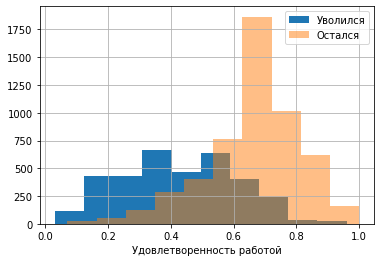

In [43]:
merge = train_1.merge(train_2,how='inner')

merge_quit = merge.query('quit == "yes"')
merge_stay = merge.query('quit == "no"')

plt.hist(merge_quit['job_satisfaction_rate'],bins=10,label='Уволился')
plt.hist(merge_stay['job_satisfaction_rate'],bins=10,label='Остался',alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Удовлетворенность работой')
plt.grid(True)
plt.show()


Распределение удовлетворенности работой демонстрирует, что уволившиеся сотрудники были менее довольны своей работой. У них наблюдаются два пика — на уровнях 0.3 и 0.5, в то время как у оставшихся сотрудников пик сосредоточен на уровне 0.7.

**Построение и визуализация матрицы корреляции phik**

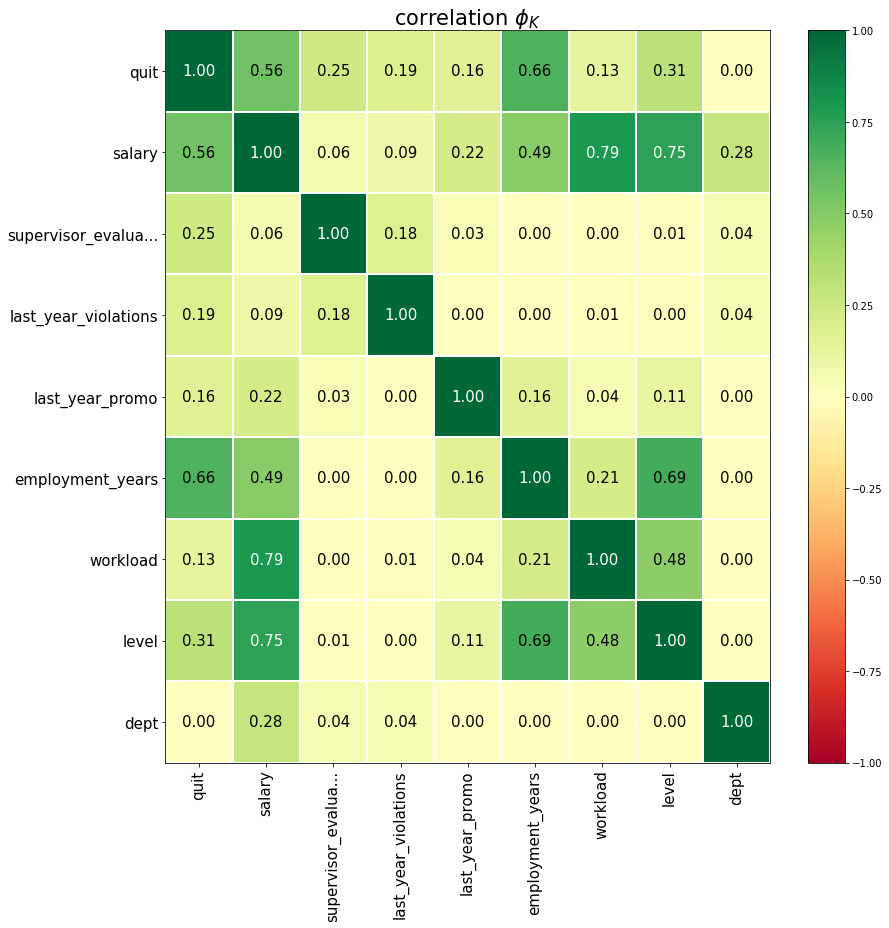

In [44]:
#для корреляционного анализа используем тепловую карту коэффициентов кореляции ф
interval_cols =['employment_years','supervisor_evaluation','salary','job_satisfaction_rate']

# вычисляем коэффициенты корреляции phik для датафрейма 
phik_overview = train_2.phik_matrix(interval_cols=interval_cols)

# визуализация тепловой карты коэффициентов корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.5,
    figsize=(13, 13)
)

**Вывод:**

Уволившиеся сотрудники получали в 1.5 раза меньшую зарплату и не были довольны своей работой.

Согласно матрице корреляции, зарплата и стаж работы в компании оказывают влияние на целевой признак.

## Добавление нового входного признака

In [45]:
merged_df = pd.merge(X_test_1, y_test_1, on='id', how='inner')

# Объединяем получившийся DataFrame с y_test_2 по столбцу 'id'
final_merged_df = pd.merge(merged_df, y_test_2, on='id', how='inner')

new_df = final_merged_df.drop(columns=['job_satisfaction_rate'])
final_merged_df['job_satisfaction_rate'] = randomized_search.best_estimator_.predict(new_df)
display(final_merged_df.head(10))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
100298,hr,junior,low,2,no,no,4,19200,0.880000,no
100480,marketing,junior,low,4,no,no,4,16800,0.852000,no
100503,purchasing,middle,high,5,no,no,4,55200,0.790000,no
100610,sales,middle,medium,5,no,no,4,43200,0.813333,no
100692,sales,middle,high,6,no,no,4,48000,0.700000,no
100710,hr,sinior,low,6,no,no,4,27600,0.781429,no
100894,sales,middle,high,6,no,no,3,56400,0.532500,no
102102,marketing,junior,medium,3,no,no,4,25200,0.767500,no
102222,marketing,middle,medium,8,no,no,4,36000,0.691429,no


In [46]:
display(final_merged_df.reset_index('id').duplicated().sum())

0

После удаления id дубликатов нет

In [47]:
X_test_2 = final_merged_df.sort_values(by='id').reset_index('id')
display(X_test_2.head(10))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,100298,hr,junior,low,2,no,no,4,19200,0.880000,no
1,100480,marketing,junior,low,4,no,no,4,16800,0.852000,no
2,100503,purchasing,middle,high,5,no,no,4,55200,0.790000,no
3,100610,sales,middle,medium,5,no,no,4,43200,0.813333,no
4,100692,sales,middle,high,6,no,no,4,48000,0.700000,no
5,100710,hr,sinior,low,6,no,no,4,27600,0.781429,no
6,100894,sales,middle,high,6,no,no,3,56400,0.532500,no
7,102102,marketing,junior,medium,3,no,no,4,25200,0.767500,no
8,102222,marketing,middle,medium,8,no,no,4,36000,0.691429,no
9,102320,sales,middle,high,4,no,no,3,57600,0.250000,no


## Подготовка данных

In [48]:
RANDOM_STATE = 42

#для заполнения пропусков подготовим пайплайн
# создадим списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years', 'supervisor_evaluation','salary']

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False)
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создайте общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)    
    ], 
    remainder =  'passthrough')

## Обучение модели


In [49]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    # словарь для модели LogisticRegression() 
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

X_train_2 = final_merged_df.drop('quit',axis=1)
y_train_2 = final_merged_df['quit']
encoder = LabelEncoder()
#y_train_1 = encoder.fit_transform(y_train_1)

randomized_search.fit(X_train_2, y_train_2)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [50]:
y_test_2 = y_test_2.reset_index('id')
y_test_2 = y_test_2.sort_values(by='id')
y_test_2 = y_test_2.set_index('id')

display(y_test_2.head(10))

,quit
id,
100298,no
100480,no
100503,no
100610,no
100692,no
100710,no
100894,no
102102,no
102222,no


In [51]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных

y_test_pred_2 = randomized_search.predict_proba(X_test_2)[:,1]
encoder.fit(y_train_2)
y_true_2 = encoder.transform(y_test_2['quit'])

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_true_2, y_test_pred_2)}')

Метрика ROC-AUC на тестовой выборке: 0.972480071712203


## Вывод

Лучшая модель, выбранная с помощью случайного подбора, — это метод поиска ближайших соседей. Метрика на тренировочной выборке составила 0.90.

На тестовой выборке результат немного ниже — 0.96.

## Общий вывод

На уровень удовлетворенности работой наибольшее влияние оказывают оценки руководителей, количество проступков за прошлый год и стаж работы в компании. Для предсказания удовлетворенности наиболее эффективной оказалась модель дерева решений.

Анализ показал, что сотрудники, покинувшие компанию, зарабатывали в 1.5 раза меньше и были менее удовлетворены своей работой. Доля уволившихся колеблется в пределах 30-40%. Основными факторами, коррелирующими с увольнением, являются зарплата и стаж работы в компании. Наилучшие результаты в предсказании увольнений продемонстрировала модель k-ближайших соседей.

**Рекомендации для бизнеса:**

- Высокий уровень увольнений (30-40%) требует внимания со стороны компании.


- Необходимо пересмотреть политику оплаты труда, поскольку уволившиеся сотрудники зарабатывали значительно меньше.


- Рекомендуется проводить беседы с недовольными сотрудниками и предлагать им новые проекты или роли. Уволившиеся работники чаще всего имели низкую рабочую нагрузку.


- Внедрение нематериальных бонусов, таких как обучение или скидки у партнеров, может улучшить ситуацию. Это поможет повысить уровень удовлетворенности и компенсировать недостатки в оплате труда и рабочей нагрузке.